<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning : 
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [ ]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz

--2022-10-12 20:17:59--  https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz [following]
--2022-10-12 20:17:59--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [application/octet-stream]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M   170MB/s    in 0.2s    

2022-10-12 20:18:00 (170 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [ ]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [ ]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then a validation set from the train set:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10/80, random_state=42) #or should we just put 10?

Let's hyperparameter gridsearch over different values of `C`:

In [ ]:
C_values = [0.01, 0.001, 0.0001, 0.00001, 0.1, 1, 2, 5, 10, 100] #add more values here to check more Cs effect (hard vs Soft Margin)
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  clf = SVC(gamma='auto', C=c) #gamma = 1 / n_features.

  # Fit on sub-train set
  clf.fit(X_train, y_train)

  # Evaluate on val set
  y_hat = clf.predict(X_val)
  acc = accuracy_score(y_val, y_hat)
  accuracies.append(acc)

  print(f'--> accuracy = {acc}')

Training SVM with C=0.01
--> accuracy = 0.10244988864142539
Training SVM with C=0.001
--> accuracy = 0.10244988864142539
Training SVM with C=0.0001
--> accuracy = 0.10244988864142539
Training SVM with C=1e-05
--> accuracy = 0.10244988864142539
Training SVM with C=0.1
--> accuracy = 0.111358574610245
Training SVM with C=1
--> accuracy = 0.512249443207127
Training SVM with C=2
--> accuracy = 0.5367483296213809
Training SVM with C=5
--> accuracy = 0.5367483296213809
Training SVM with C=10
--> accuracy = 0.5367483296213809
Training SVM with C=100
--> accuracy = 0.5367483296213809


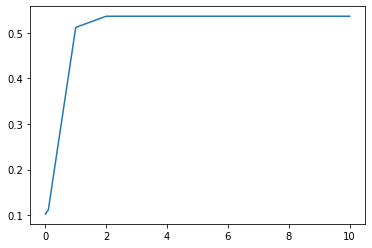

In [ ]:
#TODO plot the relation between `c` and the accuracy
plt.plot(C_values[:-1], accuracies[:-1])
plt.show()

In [ ]:
#TODO Fit on the whole train set, evaluate on the test set 

Do the same with different kernel values, and different decision functions:

**sigmoid Kernel**
VERY Bad

In [ ]:
accuracies = []
for c in C_values:
  print(f'Training SVM with C={c}')
  clf = SVC(kernel= 'sigmoid', gamma='auto', C=c) #gamma = 1 / n_features.

  # Fit on sub-train set
  clf.fit(X_train, y_train)

  # Evaluate on val set
  y_hat = clf.predict(X_val)
  acc = accuracy_score(y_val, y_hat)
  accuracies.append(acc)

  print(f'--> accuracy = {acc}')

Training SVM with C=0.01
--> accuracy = 0.10244988864142539
Training SVM with C=0.001
--> accuracy = 0.10244988864142539
Training SVM with C=0.0001
--> accuracy = 0.10244988864142539
Training SVM with C=1e-05
--> accuracy = 0.10244988864142539
Training SVM with C=0.1
--> accuracy = 0.1447661469933185
Training SVM with C=1
--> accuracy = 0.11804008908685969
Training SVM with C=2
--> accuracy = 0.0957683741648107
Training SVM with C=5
--> accuracy = 0.08685968819599109
Training SVM with C=10
--> accuracy = 0.066815144766147
Training SVM with C=100
--> accuracy = 0.060133630289532294


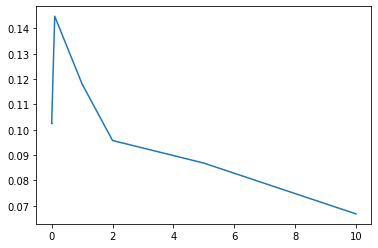

In [ ]:
plt.plot(C_values[:-1], accuracies[:-1])
plt.show()

**poly**
64%

Training SVM with C=0.01
--> accuracy = 0.6414253897550112
Training SVM with C=0.001
--> accuracy = 0.6347438752783965
Training SVM with C=0.0001
--> accuracy = 0.6169265033407573
Training SVM with C=1e-05
--> accuracy = 0.4365256124721604
Training SVM with C=0.1
--> accuracy = 0.6503340757238307
Training SVM with C=1
--> accuracy = 0.6547884187082406
Training SVM with C=2
--> accuracy = 0.6547884187082406
Training SVM with C=5
--> accuracy = 0.6547884187082406
Training SVM with C=10
--> accuracy = 0.6547884187082406
Training SVM with C=100
--> accuracy = 0.6547884187082406


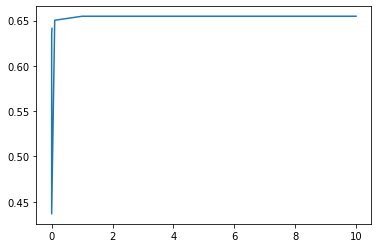

In [ ]:
accuracies = []
for c in C_values:
  print(f'Training SVM with C={c}')
  clf = SVC(kernel= 'poly', gamma='auto', C=c) #gamma = 1 / n_features.

  # Fit on sub-train set
  clf.fit(X_train, y_train)

  # Evaluate on val set
  y_hat = clf.predict(X_val)
  acc = accuracy_score(y_val, y_hat)
  accuracies.append(acc)

  print(f'--> accuracy = {acc}')

plt.plot(C_values[:-1], accuracies[:-1])
plt.show()

In [ ]:
C_values = [0.01, 0.001, 0.0001, 0.00001, 0.1, 1, 2, 5, 10, 100, 500, 1001] #add more values here to check more Cs effect (hard vs Soft Margin)
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = dict()
train_acc = dict()

for k in Kernels:
  print(f'Training SVM with kernel={k}')
  accs = []
  t_accs = []
  for c in C_values:
    print(f'Training SVM with C={c}')
    clf = SVC(C=c, kernel = k) #gamma = 1 / n_features. \one over resr

    # Fit on sub-train set
    clf.fit(X_train, y_train)

    # Evaluate on val set
    y_hat = clf.predict(X_train)
    acc = accuracy_score(y_train, y_hat)
    print(f'--> accuracy = {acc}')
    t_accs.append(acc)

    # Evaluate on val set
    y_hat = clf.predict(X_val)
    acc = accuracy_score(y_val, y_hat)
    print(f'--> accuracy = {acc}')
    accs.append(acc)

  accuracies[k] = accs
  train_acc[k]= t_accs

Training SVM with kernel=linear
Training SVM with C=0.01
--> accuracy = 1.0
--> accuracy = 0.7216035634743875
Training SVM with C=0.001
--> accuracy = 0.9690984389933099
--> accuracy = 0.7394209354120267
Training SVM with C=0.0001
--> accuracy = 0.7467346288626951
--> accuracy = 0.6726057906458798
Training SVM with C=1e-05
--> accuracy = 0.4246575342465753
--> accuracy = 0.42538975501113585
Training SVM with C=0.1
--> accuracy = 1.0
--> accuracy = 0.7193763919821826
Training SVM with C=1
--> accuracy = 1.0
--> accuracy = 0.7193763919821826
Training SVM with C=2
--> accuracy = 1.0
--> accuracy = 0.7193763919821826
Training SVM with C=5
--> accuracy = 1.0
--> accuracy = 0.7193763919821826
Training SVM with C=10
--> accuracy = 1.0
--> accuracy = 0.7193763919821826
Training SVM with C=100
--> accuracy = 1.0
--> accuracy = 0.7193763919821826
Training SVM with C=500
--> accuracy = 1.0
--> accuracy = 0.7193763919821826
Training SVM with C=1001
--> accuracy = 1.0
--> accuracy = 0.7193763919821

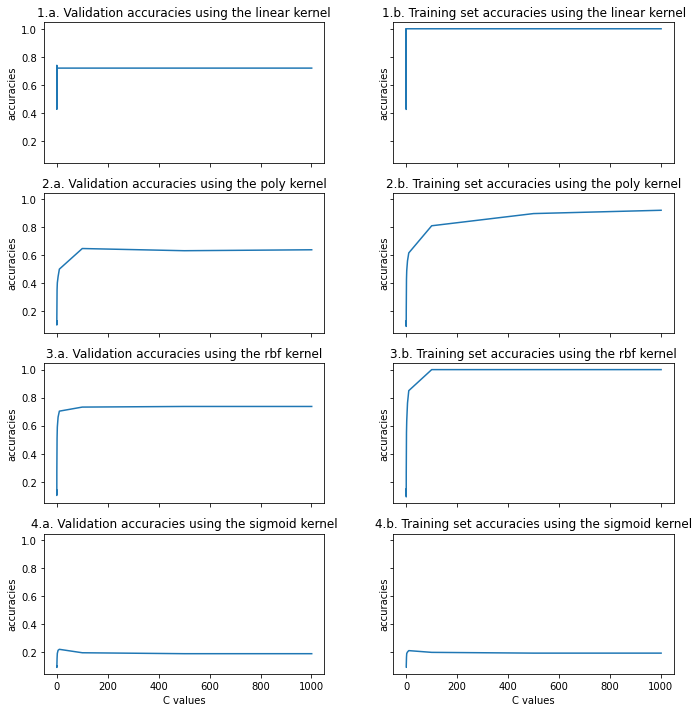

In [ ]:
fig, axs = plt.subplots(len(Kernels),2, figsize=(10, 10), sharex=True, sharey=True)
for i, k in enumerate(Kernels):
  axs[i,0].plot(C_values, accuracies[k])
  axs[i,0].set_title(str(i+1)+".a. Validation accuracies using the "+k+" kernel")
  axs[i,1].plot(C_values, train_acc[k])
  axs[i,1].set_title(str(i+1)+".b. Training set accuracies using the "+k+" kernel")
for ax in axs.flat:
    ax.set(ylabel='accuracies')

axs[3,0].set(xlabel='C values' ,ylabel='accuracies')
axs[3,1].set(xlabel='C values' ,ylabel='accuracies')
fig.tight_layout()
fig.savefig("values.pdf")


In [ ]:
    clf = SVC(C=0.001, kernel = 'linear') #gamma = 1 / n_features. \one over resr

    # Fit on sub-train set
    clf.fit(X_train, y_train)

    # Evaluate on val set
    y_hat = clf.predict(X_train)
    acc = accuracy_score(y_train, y_hat)
    print(f'--> accuracy = {acc}')

    # Evaluate on val set
    y_hat = clf.predict(X_val)
    acc = accuracy_score(y_val, y_hat)
    print(f'--> accuracy = {acc}')

    # Evaluate on test set
    y_hat = clf.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    print(f'--> accuracy = {acc}')

--> accuracy = 0.9690984389933099
--> accuracy = 0.7394209354120267
--> accuracy = 0.7357859531772575


Best accuracy so far is with linear kernel and C = 0.001: 0.7446393762183235

In [ ]:
C_values = [0.01, 0.001, 0.0001, 0.00001, 0.1, 1, 2, 5, 10, 100, 500, 1001] #add more values here to check more Cs effect (hard vs Soft Margin)
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = dict()

for k in Kernels:
  print(f'Training SVM with kernel={k}')
  accs = []
  for c in C_values:
    print(f'Training SVM with C={c}')
    clf = SVC(C=c, kernel = k,decision_function_shape='ovo') #gamma = 1 / n_features.

    # Fit on sub-train set
    clf.fit(X_train, y_train)

    # Evaluate on val set
    y_hat = clf.predict(X_val)
    acc = accuracy_score(y_val, y_hat)
    print(f'--> accuracy = {acc}')
    accs.append(acc)
  accuracies[k] = accs

Training SVM with kernel=linear
Training SVM with C=0.01
--> accuracy = 0.7216035634743875
Training SVM with C=0.001
--> accuracy = 0.7394209354120267
Training SVM with C=0.0001
--> accuracy = 0.6726057906458798
Training SVM with C=1e-05
--> accuracy = 0.42538975501113585
Training SVM with C=0.1
--> accuracy = 0.7193763919821826
Training SVM with C=1
--> accuracy = 0.7193763919821826
Training SVM with C=2
--> accuracy = 0.7193763919821826
Training SVM with C=5
--> accuracy = 0.7193763919821826
Training SVM with C=10
--> accuracy = 0.7193763919821826
Training SVM with C=100
--> accuracy = 0.7193763919821826
Training SVM with C=500
--> accuracy = 0.7193763919821826
Training SVM with C=1001
--> accuracy = 0.7193763919821826
Training SVM with kernel=poly
Training SVM with C=0.01
--> accuracy = 0.13140311804008908
Training SVM with C=0.001
--> accuracy = 0.12026726057906459
Training SVM with C=0.0001
--> accuracy = 0.1091314031180401
Training SVM with C=1e-05
--> accuracy = 0.10244988864142

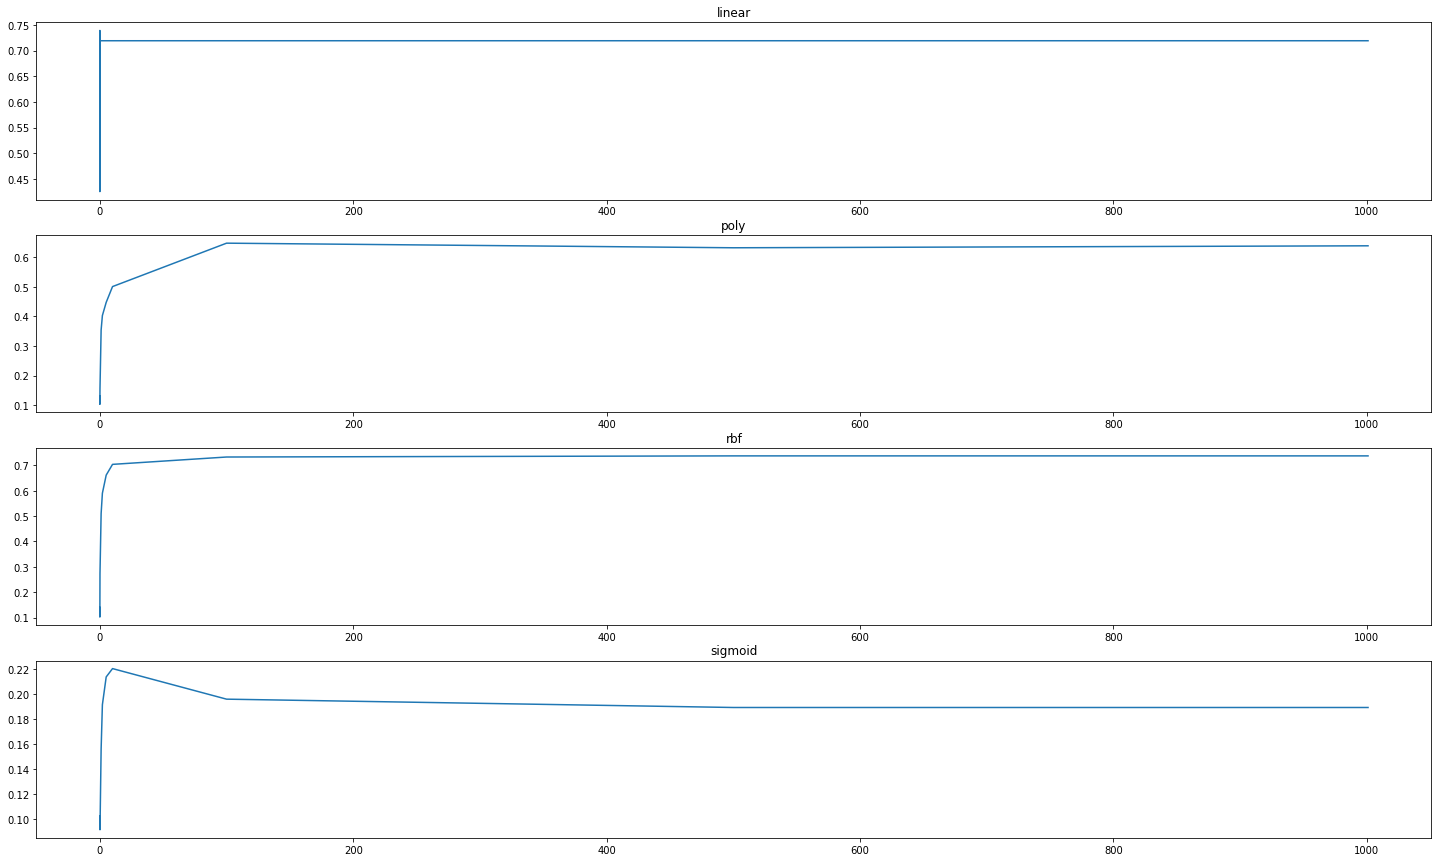

In [ ]:
fig, axs = plt.subplots(len(Kernels), figsize=(25, 15))
for i, k in enumerate(Kernels):
  axs[i].plot(C_values, accuracies[k])
  axs[i].set_title(k)